<a href="https://colab.research.google.com/github/youssoubo1/zadanie/blob/main/exo_5_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# лоб 5-6

###1

In [8]:
pip install umap-learn

     |████████████████████████████████| 86 kB 2.3 MB/s 
     |████████████████████████████████| 1.1 MB 30.0 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.2-py3-none-any.whl size=82709 sha256=70cb06cb6ab1ae2acf3c0b6f64a8f7c36b96a8b739ac14db766ea948a88a3293
  Stored in directory: /root/.cache/pip/wheels/84/1b/c6/aaf68a748122632967cef4dffef68224eb16798b6793257d82
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=76f3a998912a0c525954dc9e4603f3a2740f29959ed0cbb48f8b0fc0ed5be3b9
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [9]:
  import umap
  from sklearn import svm 
  from sklearn.manifold import TSNE
  from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
  import matplotlib.pyplot as plt
  from sklearn.metrics import accuracy_score
  from sklearn.model_selection import train_test_split
  import seaborn as sns
  import plotly.express as px 

  from tensorflow import keras
  import pandas as pd
  import numpy as np
  
  # import plotly.graph_objects as go
  # from sklearn import preprocessing
  # from sklearn.metrics import confusion_matrix, recall_score, precision_score
  # from keras.models import Sequential
  # from keras.layers import Dense, Dropout, LSTM, Activation, SimpleRNN, GRU, RNN
  # %matplotlib inline


In [3]:
import pandas as pd
import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['processed.cleveland.data']), header=None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang','oldpeak','slope', 'ca','thal', 'classAttr']

Saving processed.cleveland.data to processed.cleveland.data


In [12]:
from numpy.ma.extras import average
if __name__ == '__main__':
    print(df.classAttr.unique())
    print('\n')
    print(df['classAttr'].value_counts())
    print('\n')
    names = df.columns.to_list()
    print(names)
    print('_'*120+'\n')

    X = df[names[:-1]].values
    X = StandardScaler().fit_transform(X)
    x_train, x_test, y_train, y_test = train_test_split(X,df.classAttr, test_size=0.33, random_state=42)
    
    #UMAP
    reducer = umap.UMAP()
    embedded = reducer.fit_transform(x_test)

    import plotly.graph_objects as go

    fig = px.scatter(embedded, x = 0, y = 1, color = y_test, labels = ['color', 'classAttr'])
    fig.update_layout(title_text = 'UMAP Исходные данные', title_x = 0.5)
    fig.show()

    #tSNE

    reducer = TSNE()
    embedded = reducer.fit_transform(x_test)

    fig = px.scatter(embedded, x = 0, y = 1, color = y_test, labels = ['color', 'classAttr'])
    fig.update_layout(title_text = 'tSNE Исходные данные', title_x = 0.5)
    fig.show()


    # Обучение

    model = svm.SVC()
    model.fit(x_train, y_train)

    y_pred = model.predict(x_test)
    print(model.n_support_)


    # Метрики

    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

    print('\nМетрики: ')
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: " + str(accuracy))

    recall = recall_score(y_test, y_pred, average = 'weighted')
    print("Recall: " + str(recall))

    precision = precision_score(y_test, y_pred, average = 'weighted')
    print("Precision: " + str(precision))

    f1 = f1_score(y_test, y_pred, average = 'weighted')
    print("F1: " + str(f1))

[0 2 1 3 4]


0    164
1     55
2     36
3     35
4     13
Name: classAttr, dtype: int64


['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'classAttr']
________________________________________________________________________________________________________________________



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[64 35 22 24  9]

Метрики: 
Accuracy: 0.51
Recall: 0.51
Precision: 0.4120667495854063
F1: 0.44902711006616686


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



#### обучающие данные

In [16]:
if __name__ == '__main__':
    model = svm.SVC(kernel= 'poly', C=1000)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print("\nМетрики")
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: " + str(accuracy))

    recall = recall_score(y_test, y_pred, average = 'weighted')
    print("Recall: " + str(recall))

    precision = precision_score(y_test, y_pred, average='weighted')
    print("Precision: " + str(precision))

    f1 = f1_score(y_test, y_pred, average='weighted')
    print("F1: " + str(f1))



Метрики
Accuracy: 0.57
Recall: 0.57
Precision: 0.5514327485380117
F1: 0.5603369963369963


#### Тестовые данные

In [ ]:
# read test data
test_df = pd.read_csv('PM_test.txt', sep=" ", header=None)
test_df.drop(test_df.columns[[26, 27]], axis=1, inplace=True)
test_df.columns = ['id', 'cycle', 'setting1', 'setting2', 'setting3', 's1', 's2', 's3',
                     's4', 's5', 's6', 's7', 's8', 's9', 's10', 's11', 's12', 's13', 's14',
                     's15', 's16', 's17', 's18', 's19', 's20', 's21']

##### Количество оставшихся циклов

In [ ]:
# read ground truth data
truth_df = pd.read_csv('PM_truth.txt', sep=" ", header=None)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)

#### id двигатели


In [ ]:
# id двигатели
train_df.loc[train_df['id']==28]

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21
5465,28,1,-0.0003,-0.0001,100.0,518.67,642.14,1584.11,1392.44,14.62,21.61,554.84,2387.99,9068.32,1.3,47.14,522.67,2388.00,8145.82,8.3899,0.03,391,2388,100.0,39.18,23.3642
5466,28,2,-0.0002,0.0003,100.0,518.67,642.41,1583.78,1391.70,14.62,21.61,555.39,2387.99,9056.19,1.3,47.05,522.75,2387.98,8143.47,8.3977,0.03,391,2388,100.0,39.22,23.4739
5467,28,3,0.0006,-0.0004,100.0,518.67,642.13,1583.81,1396.23,14.62,21.60,554.32,2388.01,9066.04,1.3,47.27,521.84,2387.99,8139.99,8.3898,0.03,391,2388,100.0,39.10,23.5312
5468,28,4,0.0020,-0.0001,100.0,518.67,642.51,1593.03,1395.05,14.62,21.61,554.87,2387.95,9065.22,1.3,47.07,522.72,2388.02,8145.79,8.3887,0.03,393,2388,100.0,39.01,23.3791
5469,28,5,0.0002,-0.0000,100.0,518.67,642.39,1577.87,1396.30,14.62,21.61,554.40,2387.98,9060.76,1.3,47.10,522.95,2387.96,8140.29,8.3771,0.03,394,2388,100.0,39.01,23.4707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,28,161,-0.0023,-0.0001,100.0,518.67,643.60,1594.00,1426.37,14.62,21.61,551.52,2388.18,9089.03,1.3,48.15,519.94,2388.22,8154.17,8.5019,0.03,396,2388,100.0,38.43,23.2617
5626,28,162,0.0003,-0.0000,100.0,518.67,643.83,1604.96,1430.24,14.62,21.61,551.63,2388.27,9081.64,1.3,48.14,519.94,2388.25,8154.59,8.5141,0.03,396,2388,100.0,38.26,23.2241
5627,28,163,0.0046,0.0002,100.0,518.67,643.73,1601.34,1421.09,14.62,21.61,551.12,2388.17,9085.22,1.3,48.28,519.96,2388.18,8158.02,8.5312,0.03,396,2388,100.0,38.59,23.0807
5628,28,164,-0.0038,-0.0002,100.0,518.67,643.71,1594.05,1431.96,14.62,21.61,551.92,2388.28,9088.77,1.3,48.13,520.27,2388.24,8158.56,8.5308,0.03,396,2388,100.0,38.59,22.9402


#### Остаток срока службы

In [ ]:
# Data Labeling - generate column RUL
# is a specific engine going to fail within w1 cycles?
rul = pd.DataFrame(train_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
train_df = train_df.merge(rul, on=['id'], how='left')
train_df['RUL'] = train_df['max'] - train_df['cycle']
train_df.drop('max', axis=1, inplace=True)
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


In [ ]:
# generate label columns for training data
w1 = 30
w0 = 15
# бинарная классификация
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL,label1,label2
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0,0


#### Нормализация MinMaxScaler()

In [ ]:
# Нормализация MinMaxScaler()
# MinMax normalization
train_df['cycle_norm'] = train_df['cycle']
cols_normalize = train_df.columns.difference(['id','cycle','RUL','label1','label2'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
train_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,RUL,label1,label2,cycle_norm
0,1,1,0.459770,0.166667,0.0,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,0.242424,0.109755,0.0,0.369048,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191,0,0,0.00000
1,1,2,0.609195,0.250000,0.0,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,0.212121,0.100242,0.0,0.380952,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190,0,0,0.00277
2,1,3,0.252874,0.750000,0.0,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,0.272727,0.140043,0.0,0.250000,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189,0,0,0.00554
3,1,4,0.540230,0.500000,0.0,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,0.318182,0.124518,0.0,0.166667,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188,0,0,0.00831
4,1,5,0.390805,0.333333,0.0,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,0.242424,0.149960,0.0,0.255952,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187,0,0,0.01108


In [ ]:
test_df['cycle_norm'] = test_df['cycle']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm
0,1,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,1.0,0.652174,0.212121,0.127614,0.0,0.208333,0.646055,0.220588,0.132160,0.308965,0.0,0.333333,0.0,0.0,0.558140,0.661834,0.00000
1,1,2,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,1.0,0.805153,0.166667,0.146684,0.0,0.386905,0.739872,0.264706,0.204768,0.213159,0.0,0.416667,0.0,0.0,0.682171,0.686827,0.00277
2,1,3,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,1.0,0.685990,0.227273,0.158081,0.0,0.386905,0.699360,0.220588,0.155640,0.458638,0.0,0.416667,0.0,0.0,0.728682,0.721348,0.00554
3,1,4,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,1.0,0.679549,0.196970,0.105717,0.0,0.255952,0.573561,0.250000,0.170090,0.257022,0.0,0.250000,0.0,0.0,0.666667,0.662110,0.00831
4,1,5,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,1.0,0.694042,0.166667,0.102396,0.0,0.273810,0.737740,0.220588,0.152751,0.300885,0.0,0.166667,0.0,0.0,0.658915,0.716377,0.01108


In [ ]:
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('id')['cycle'].max()).reset_index()
rul.columns = ['id', 'max']
truth_df.columns = ['more']
truth_df['id'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['more']
truth_df.drop('more', axis=1, inplace=True)

In [ ]:
# generate RUL for test data
test_df = test_df.merge(truth_df, on=['id'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycle']
test_df.drop('max', axis=1, inplace=True)
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm,RUL
0,1,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,1.0,0.652174,0.212121,0.127614,0.0,0.208333,0.646055,0.220588,0.132160,0.308965,0.0,0.333333,0.0,0.0,0.558140,0.661834,0.00000,142
1,1,2,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,1.0,0.805153,0.166667,0.146684,0.0,0.386905,0.739872,0.264706,0.204768,0.213159,0.0,0.416667,0.0,0.0,0.682171,0.686827,0.00277,141
2,1,3,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,1.0,0.685990,0.227273,0.158081,0.0,0.386905,0.699360,0.220588,0.155640,0.458638,0.0,0.416667,0.0,0.0,0.728682,0.721348,0.00554,140
3,1,4,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,1.0,0.679549,0.196970,0.105717,0.0,0.255952,0.573561,0.250000,0.170090,0.257022,0.0,0.250000,0.0,0.0,0.666667,0.662110,0.00831,139
4,1,5,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,1.0,0.694042,0.166667,0.102396,0.0,0.273810,0.737740,0.220588,0.152751,0.300885,0.0,0.166667,0.0,0.0,0.658915,0.716377,0.01108,138


In [ ]:
# generate label columns w0 and w1 for test data
test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2
test_df.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,cycle_norm,RUL,label1,label2
0,1,1,0.632184,0.750000,0.0,0.0,0.545181,0.310661,0.269413,0.0,1.0,0.652174,0.212121,0.127614,0.0,0.208333,0.646055,0.220588,0.132160,0.308965,0.0,0.333333,0.0,0.0,0.558140,0.661834,0.00000,142,0,0
1,1,2,0.344828,0.250000,0.0,0.0,0.150602,0.379551,0.222316,0.0,1.0,0.805153,0.166667,0.146684,0.0,0.386905,0.739872,0.264706,0.204768,0.213159,0.0,0.416667,0.0,0.0,0.682171,0.686827,0.00277,141,0,0
2,1,3,0.517241,0.583333,0.0,0.0,0.376506,0.346632,0.322248,0.0,1.0,0.685990,0.227273,0.158081,0.0,0.386905,0.699360,0.220588,0.155640,0.458638,0.0,0.416667,0.0,0.0,0.728682,0.721348,0.00554,140,0,0
3,1,4,0.741379,0.500000,0.0,0.0,0.370482,0.285154,0.408001,0.0,1.0,0.679549,0.196970,0.105717,0.0,0.255952,0.573561,0.250000,0.170090,0.257022,0.0,0.250000,0.0,0.0,0.666667,0.662110,0.00831,139,0,0
4,1,5,0.580460,0.500000,0.0,0.0,0.391566,0.352082,0.332039,0.0,1.0,0.694042,0.166667,0.102396,0.0,0.273810,0.737740,0.220588,0.152751,0.300885,0.0,0.166667,0.0,0.0,0.658915,0.716377,0.01108,138,0,0


In [ ]:
# pick a large window size of 50 cycles
sequence_length = 50

In [ ]:
# preparing data for visualizations 
# window of 50 cycles prior to a failure point for engine id 28
engine_id3 = test_df[test_df['id'] == 28]
engine_id3_50cycleWindow = engine_id3[engine_id3['RUL'] <= engine_id3['RUL'].min() + 50]
cols1 = ['s1', 's2', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's10']
engine_id3_50cycleWindow1 = engine_id3_50cycleWindow[cols1]
cols2 = ['s11', 's12', 's13', 's14', 's15', 's16', 's17', 's18', 's19', 's20', 's21']
engine_id3_50cycleWindow2 = engine_id3_50cycleWindow[cols2]

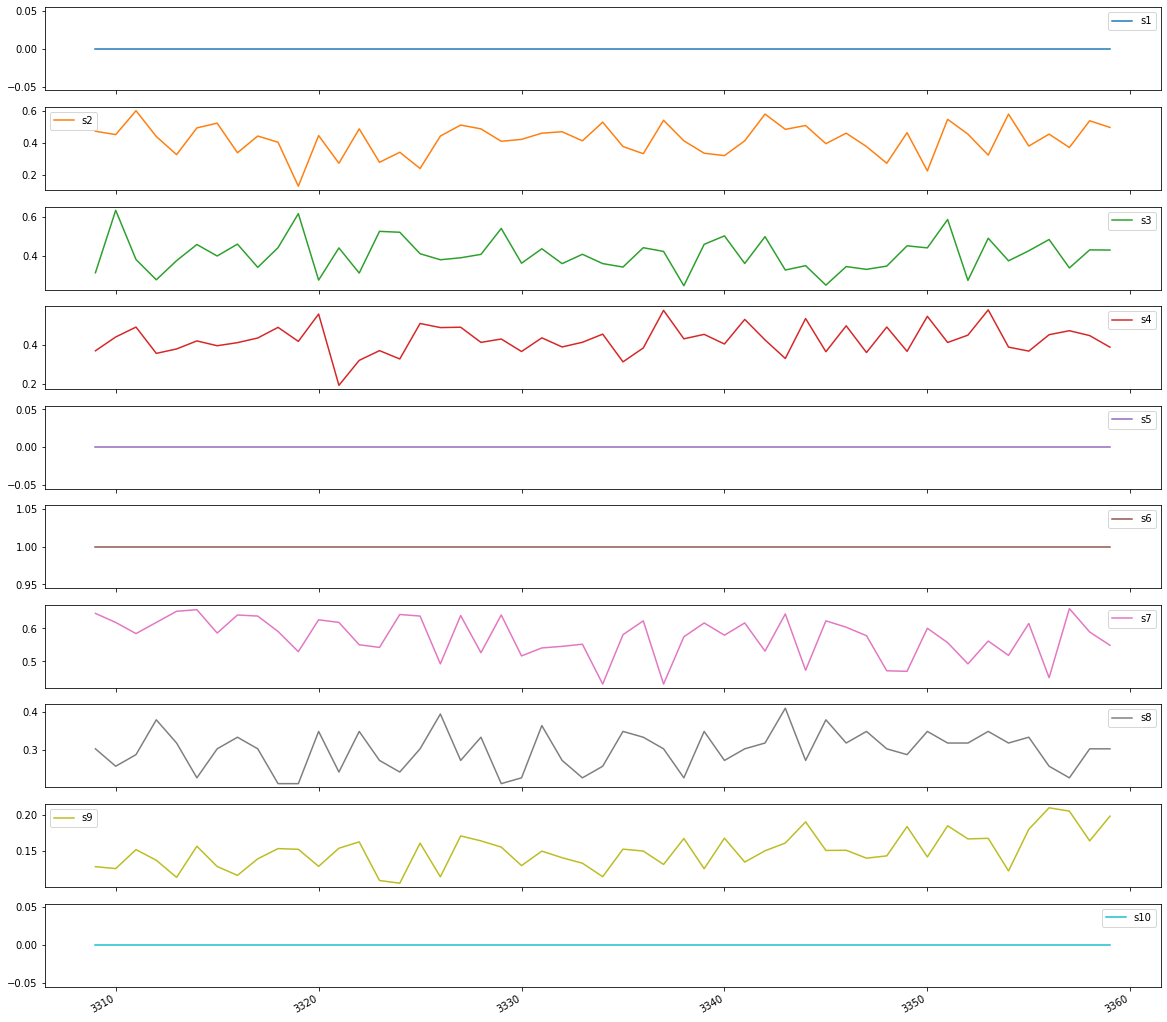

In [ ]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 1-10 
ax1 = engine_id3_50cycleWindow1.plot(subplots=True, sharex=True, figsize=(20,20))

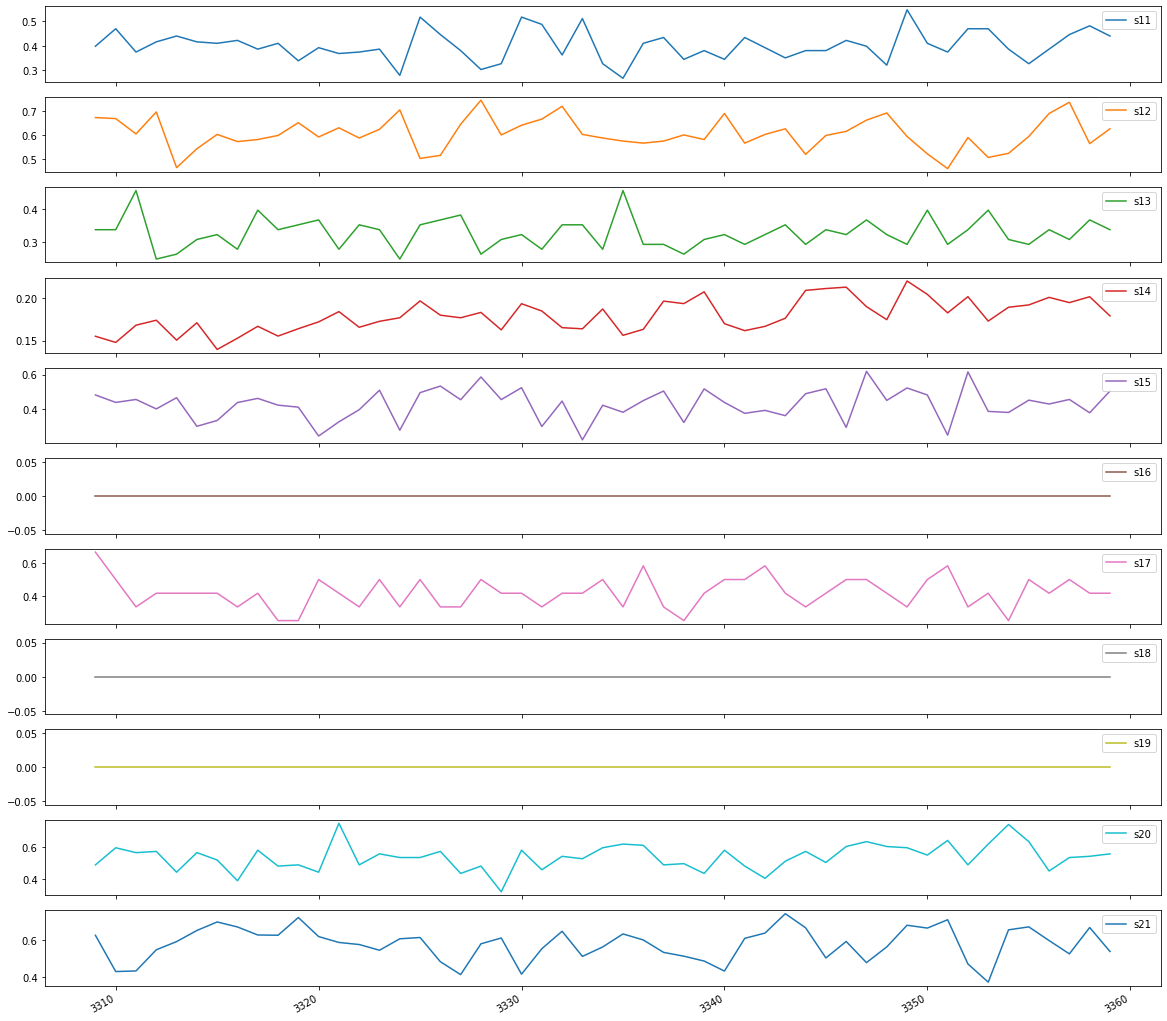

In [ ]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 11-21 
ax2 = engine_id3_50cycleWindow2.plot(subplots=True, sharex=True, figsize=(20,20))

In [ ]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

In [ ]:
# pick the feature columns 
sensor_cols = ['s' + str(i) for i in range(1,22)]
sequence_cols = ['setting1', 'setting2', 'setting3', 'cycle_norm']
sequence_cols.extend(sensor_cols)

In [ ]:
# generator for the sequences
seq_gen = (list(gen_sequence(train_df[train_df['id']==id], sequence_length, sequence_cols)) 
           for id in train_df['id'].unique())

In [ ]:
# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

(15631, 50, 25)

In [ ]:
# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [ ]:
# generate labels
label_gen = [gen_labels(train_df[train_df['id']==id], sequence_length, ['label1']) 
             for id in train_df['id'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(15631, 1)

##LSTM

In [ ]:
# build the network
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]
#The first layer is an LSTM layer with 100 units followed by another LSTM layer with 50 units.
#Dropout is also applied after each LSTM layer to control overfitting
#Final layer is a Dense output layer with single unit and sigmoid activation since this is a binary classification problem.
model = Sequential() # сеть на один уровень за раз

model.add(LSTM(
         input_shape=(sequence_length, nb_features),
         units=100,                                         # положительное число - размерность выходного пр-ва
         return_sequences=True)) #следует ли возвращать последний выход. в выходной последовательности или в полной;по умолчанию False
model.add(Dropout(0.2))                                     # Слой для предотврашения переобучающих данных

model.add(LSTM(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=nb_out, activation='sigmoid')) # полностые подключенный выходной слой; даёт пероятность для каждого слова и соваре с исп....
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 100)           50400     
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                30200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 80,651
Trainable params: 80,651
Non-trainable params: 0
_________________________________________________________________
None


#### fit the network

In [ ]:
%%time
# fit the network
history =  model.fit(seq_array, label_array, epochs=10, batch_size=200, validation_split=0.05, verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')])

Epoch 1/10
75/75 [==============================] - 27s 290ms/step - loss: 0.2737 - accuracy: 0.8845 - val_loss: 0.1029 - val_accuracy: 0.9514
Epoch 2/10
75/75 [==============================] - 31s 415ms/step - loss: 0.1169 - accuracy: 0.9529 - val_loss: 0.1130 - val_accuracy: 0.9578
Epoch 3/10
75/75 [==============================] - 21s 274ms/step - loss: 0.0807 - accuracy: 0.9669 - val_loss: 0.0468 - val_accuracy: 0.9808
Epoch 4/10
75/75 [==============================] - 32s 427ms/step - loss: 0.0844 - accuracy: 0.9667 - val_loss: 0.0371 - val_accuracy: 0.9898
Epoch 5/10
75/75 [==============================] - 32s 429ms/step - loss: 0.0659 - accuracy: 0.9721 - val_loss: 0.0340 - val_accuracy: 0.9872
Epoch 6/10
75/75 [==============================] - 35s 463ms/step - loss: 0.0623 - accuracy: 0.9742 - val_loss: 0.0442 - val_accuracy: 0.9808
Epoch 7/10
75/75 [==============================] - 31s 407ms/step - loss: 0.0655 - accuracy: 0.9732 - val_loss: 0.0365 - val_accuracy: 0.9898

In [ ]:
print(seq_array.shape)
print(label_array.shape)

(15631, 50, 25)
(15631, 1)


#### training metrics

In [ ]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))
print('LOss: {}'.format(scores[0]))
loss = scores[0]

79/79 [==============================] - 11s 138ms/step - loss: 0.0635 - accuracy: 0.9712
Accurracy: 0.9712110757827759
LOss: 0.06348875910043716


#### make predictions and compute confusion matrix

In [ ]:
# make predictions and compute confusion matrix
y_pred = (model.predict(seq_array,verbose=1, batch_size=200)>0.5).astype("int32")
y_true = label_array
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
cm

79/79 [==============================] - 8s 92ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[12502,    29],
       [  421,  2679]])

#### compute precision and recall

In [ ]:
# compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = 2 * (precision * recall) / (precision + recall)
print( 'precision = ', precision, '\n', 'recall = ', recall, '\n', 'f1 = ', f1)

precision =  0.9892909896602659 
 recall =  0.8641935483870967 
 f1 =  0.9225206611570248


In [ ]:
seq_array_test_last = [test_df[test_df['id']==id][sequence_cols].values[-sequence_length:] 
                       for id in test_df['id'].unique() if len(test_df[test_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last.shape

(93, 50, 25)

In [ ]:
y_mask = [len(test_df[test_df['id']==id]) >= sequence_length for id in test_df['id'].unique()]

In [ ]:
label_array_test_last = test_df.groupby('id')['label1'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
label_array_test_last.shape

(93, 1)

In [ ]:
print(seq_array_test_last.shape)
print(label_array_test_last.shape)

(93, 50, 25)
(93, 1)


#### test metrics

In [ ]:
# test metrics
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('Accurracy: {}'.format(scores_test[1]))
print('LOss: {}'.format(scores[0]))
loss_test = scores_test[0]

3/3 - 0s - loss: 0.0811 - accuracy: 0.9677 - 89ms/epoch - 30ms/step
Accurracy: 0.9677419066429138
LOss: 0.06348875910043716


#### make predictions and compute confusion matrix

In [ ]:
# make predictions and compute confusion matrix
y_pred_test = (model.predict(seq_array_test_last)>0.5).astype('int32')
y_true_test = label_array_test_last
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true_test, y_pred_test)
cm

Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[68,  0],
       [ 3, 22]])

#### compute precision and recall

In [ ]:
# compute precision and recall
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Precision: ', precision_test, '\n', 'Recall: ', recall_test,'\n', 'F1-score:', f1_test )

Precision:  1.0 
 Recall:  0.88 
 F1-score: 0.9361702127659575


In [ ]:
results_df = pd.DataFrame([[scores_test[1],precision_test,recall_test,f1_test,loss_test, 'LSTM_test'],
                          [scores[1], precision, recall, f1, loss, 'LSTM_train']],
                         columns = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'LOSS', 'Method'],
                         index = ['Testing data',
                                 'training data'])
results_df

,Accuracy,Precision,Recall,F1-score,LOSS,Method
Testing data,0.967742,1.000000,0.880000,0.936170,0.081056,LSTM_test
training data,0.971211,0.989291,0.864194,0.922521,0.063489,LSTM_train


In [ ]:
metrics_df = results_df
print(metrics_df)

               Accuracy  Precision    Recall  F1-score      LOSS      Method
Testing data   0.967742   1.000000  0.880000  0.936170  0.081056   LSTM_test
training data  0.971211   0.989291  0.864194  0.922521  0.063489  LSTM_train


##GRU

In [ ]:
# build the network
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]
#The first layer is an LSTM layer with 100 units followed by another LSTM layer with 50 units.
#Dropout is also applied after each LSTM layer to control overfitting
#Final layer is a Dense output layer with single unit and sigmoid activation since this is a binary classification problem.
model = Sequential() # сеть на один уровень за раз

model.add(GRU(
         input_shape=(sequence_length, nb_features),
         units=100,# положительное число - размерность выходного пр-ва
         return_sequences=True)) #следует ли возвращать последний выход. в выходной последовательности или в полной;по умолчанию False
model.add(Dropout(0.2))# Слой для предотврашения переобучающих данных

model.add(GRU(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=nb_out, activation='sigmoid')) # полностые подключенный выходной слой; даёт пероятность для каждого слова и соваре с исп....
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50, 100)           38100     
                                                                 
 dropout_2 (Dropout)         (None, 50, 100)           0         
                                                                 
 gru_1 (GRU)                 (None, 50)                22800     
                                                                 
 dropout_3 (Dropout)         (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 60,951
Trainable params: 60,951
Non-trainable params: 0
_________________________________________________________________
None


#### fit the network

In [ ]:
%%time
# fit the network
history =  model.fit(seq_array, label_array, epochs=10, batch_size=200, validation_split=0.05, verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')])

Epoch 1/10
75/75 [==============================] - 27s 282ms/step - loss: 0.2586 - accuracy: 0.8891 - val_loss: 0.1613 - val_accuracy: 0.9258
Epoch 2/10
75/75 [==============================] - 19s 253ms/step - loss: 0.1359 - accuracy: 0.9416 - val_loss: 0.1247 - val_accuracy: 0.9437
Epoch 3/10
75/75 [==============================] - 20s 270ms/step - loss: 0.0903 - accuracy: 0.9612 - val_loss: 0.0703 - val_accuracy: 0.9693
Epoch 4/10
75/75 [==============================] - 19s 260ms/step - loss: 0.0600 - accuracy: 0.9729 - val_loss: 0.0439 - val_accuracy: 0.9847
Epoch 5/10
75/75 [==============================] - 20s 264ms/step - loss: 0.0591 - accuracy: 0.9749 - val_loss: 0.0829 - val_accuracy: 0.9629
Epoch 6/10
75/75 [==============================] - 19s 259ms/step - loss: 0.0611 - accuracy: 0.9740 - val_loss: 0.0421 - val_accuracy: 0.9834
Epoch 7/10
75/75 [==============================] - 19s 256ms/step - loss: 0.0497 - accuracy: 0.9799 - val_loss: 0.0433 - val_accuracy: 0.9808

In [ ]:
print(seq_array.shape)
print(label_array.shape)

(15631, 50, 25)
(15631, 1)


#### training metrics

In [ ]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))
print('LOss: {}'.format(scores[0]))
loss = scores[0]

79/79 [==============================] - 6s 78ms/step - loss: 0.0602 - accuracy: 0.9733
Accurracy: 0.9733222723007202
LOss: 0.06022436544299126


#### make predictions and compute confusion matrix

In [ ]:
# make predictions and compute confusion matrix
y_pred = (model.predict(seq_array,verbose=1, batch_size=200)>0.5).astype("int32")
y_true = label_array
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
cm

79/79 [==============================] - 7s 77ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[12502,    29],
       [  388,  2712]])

#### compute precision and recall

In [ ]:
# compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = 2 * (precision * recall)/(precision+recall)
print( 'precision = ', precision, '\n', 'recall = ', recall, '\n', 'f1 = ', f1)

precision =  0.9894199197373221 
 recall =  0.8748387096774194 
 f1 =  0.9286081150487929


In [ ]:
seq_array_test_last = [test_df[test_df['id']==id][sequence_cols].values[-sequence_length:] 
                       for id in test_df['id'].unique() if len(test_df[test_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last.shape

(93, 50, 25)

In [ ]:
y_mask = [len(test_df[test_df['id']==id]) >= sequence_length for id in test_df['id'].unique()]

In [ ]:
label_array_test_last = test_df.groupby('id')['label1'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
label_array_test_last.shape

(93, 1)

In [ ]:
print(seq_array_test_last.shape)
print(label_array_test_last.shape)

(93, 50, 25)
(93, 1)


#### test metrics

In [ ]:
# test metrics
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('Accurracy: {}'.format(scores_test[1]))
print('LOss: {}'.format(scores[0]))
loss_test = scores_test[0]

3/3 - 0s - loss: 0.0750 - accuracy: 0.9677 - 78ms/epoch - 26ms/step
Accurracy: 0.9677419066429138
LOss: 0.06022436544299126


#### make predictions and compute confusion matrix

In [ ]:
# make predictions and compute confusion matrix
y_pred_test = (model.predict(seq_array_test_last)>0.5).astype('int32')
y_true_test = label_array_test_last
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true_test, y_pred_test)
cm

Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[68,  0],
       [ 3, 22]])

#### compute precision and recall

In [ ]:
# compute precision and recall
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Precision: ', precision_test, '\n', 'Recall: ', recall_test,'\n', 'F1-score:', f1_test )


Precision:  1.0 
 Recall:  0.88 
 F1-score: 0.9361702127659575


In [ ]:
results_df = pd.DataFrame([[scores_test[1],precision_test,recall_test,f1_test,loss_test, 'GRU_test'],
                          [scores[1],precision,recall,f1,loss, 'GRU_train']],
                         columns = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'LOSS', 'Method'],
                         index = ['Testing data',
                                 'training data'])
results_df

,Accuracy,Precision,Recall,F1-score,LOSS,Method
Testing data,0.967742,1.00000,0.880000,0.936170,0.075048,GRU_test
training data,0.973322,0.98942,0.874839,0.928608,0.060224,GRU_train


In [ ]:
# metrics_df = results_df
# print(metrics_df)

In [ ]:
metrics_df = metrics_df.append(results_df)
metrics_df

,Accuracy,Precision,Recall,F1-score,LOSS,Method
Testing data,0.967742,1.000000,0.880000,0.936170,0.081056,LSTM_test
training data,0.971211,0.989291,0.864194,0.922521,0.063489,LSTM_train
Testing data,0.967742,1.000000,0.880000,0.936170,0.075048,GRU_test
training data,0.973322,0.989420,0.874839,0.928608,0.060224,GRU_train


##RNN

In [ ]:
# build the network
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]
#The first layer is an LSTM layer with 100 units followed by another LSTM layer with 50 units.
#Dropout is also applied after each LSTM layer to control overfitting
#Final layer is a Dense output layer with single unit and sigmoid activation since this is a binary classification problem.
model = Sequential() # сеть на один уровень за раз

model.add(SimpleRNN(
         input_shape=(sequence_length, nb_features),
         units=100,# положительное число - размерность выходного пр-ва
         return_sequences=True)) #следует ли возвращать последний выход. в выходной последовательности или в полной;по умолчанию False
model.add(Dropout(0.2))# Слой для предотврашения переобучающих данных

model.add(SimpleRNN(
          units=50,
          return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=nb_out, activation='sigmoid')) # полностые подключенный выходной слой; даёт пероятность для каждого слова и соваре с исп....
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50, 100)           12600     
                                                                 
 dropout_4 (Dropout)         (None, 50, 100)           0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 50)                7550      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 20,201
Trainable params: 20,201
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
%%time
# fit the network
history =  model.fit(seq_array, label_array, epochs=10, batch_size=200, validation_split=0.05, verbose=1,
          callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')])

Epoch 1/10
75/75 [==============================] - 11s 104ms/step - loss: 0.1808 - accuracy: 0.9245 - val_loss: 0.0979 - val_accuracy: 0.9552
Epoch 2/10
75/75 [==============================] - 8s 102ms/step - loss: 0.1433 - accuracy: 0.9417 - val_loss: 0.1451 - val_accuracy: 0.9386
Epoch 3/10
75/75 [==============================] - 7s 100ms/step - loss: 0.1205 - accuracy: 0.9473 - val_loss: 0.1148 - val_accuracy: 0.9527
Epoch 4/10
75/75 [==============================] - 7s 99ms/step - loss: 0.0976 - accuracy: 0.9596 - val_loss: 0.0769 - val_accuracy: 0.9629
Epoch 5/10
75/75 [==============================] - 7s 97ms/step - loss: 0.0932 - accuracy: 0.9600 - val_loss: 0.0749 - val_accuracy: 0.9680
Epoch 6/10
75/75 [==============================] - 7s 98ms/step - loss: 0.0876 - accuracy: 0.9642 - val_loss: 0.1011 - val_accuracy: 0.9540
Epoch 7/10
75/75 [==============================] - 7s 99ms/step - loss: 0.0981 - accuracy: 0.9598 - val_loss: 0.0823 - val_accuracy: 0.9578
Epoch 8/1

In [ ]:
print(seq_array.shape)
print(label_array.shape)

(15631, 50, 25)
(15631, 1)


In [ ]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Accurracy: {}'.format(scores[1]))
print('LOss: {}'.format(scores[0]))
loss = scores[0]


79/79 [==============================] - 3s 34ms/step - loss: 0.0818 - accuracy: 0.9697
Accurracy: 0.9696756601333618
LOss: 0.08175218850374222


In [ ]:
# make predictions and compute confusion matrix
y_pred = (model.predict(seq_array,verbose=1, batch_size=200)>0.5).astype("int32")
y_true = label_array
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true, y_pred)
cm


79/79 [==============================] - 3s 33ms/step
Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[12390,   141],
       [  333,  2767]])

In [ ]:
# compute precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = 2*(precision* recall)/(precision+recall)
print( 'precision = ', precision, '\n', 'recall = ', recall, '\n', 'f1 = ', f1)


precision =  0.9515130674002751 
 recall =  0.8925806451612903 
 f1 =  0.9211051930758988


In [ ]:
seq_array_test_last = [test_df[test_df['id']==id][sequence_cols].values[-sequence_length:] 
                       for id in test_df['id'].unique() if len(test_df[test_df['id']==id]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last.shape

(93, 50, 25)

In [ ]:
y_mask = [len(test_df[test_df['id']==id]) >= sequence_length for id in test_df['id'].unique()]

In [ ]:
label_array_test_last = test_df.groupby('id')['label1'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
label_array_test_last.shape


(93, 1)

In [ ]:
print(seq_array_test_last.shape)
print(label_array_test_last.shape)


(93, 50, 25)
(93, 1)


In [ ]:
# test metrics
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('Accurracy: {}'.format(scores_test[1]))
print('LOss: {}'.format(scores[0]))
loss_test = scores_test[0]

3/3 - 0s - loss: 0.1304 - accuracy: 0.9570 - 44ms/epoch - 15ms/step
Accurracy: 0.9569892287254333
LOss: 0.08175218850374222


In [ ]:
# make predictions and compute confusion matrix
y_pred_test = (model.predict(seq_array_test_last)>0.5).astype('int32')
y_true_test = label_array_test_last
print('Confusion matrix\n- x-axis is true labels.\n- y-axis is predicted labels')
cm = confusion_matrix(y_true_test, y_pred_test)
cm


Confusion matrix
- x-axis is true labels.
- y-axis is predicted labels


array([[68,  0],
       [ 4, 21]])

In [ ]:
# compute precision and recall
precision_test = precision_score(y_true_test, y_pred_test)
recall_test = recall_score(y_true_test, y_pred_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
print( 'Precision: ', precision_test, '\n', 'Recall: ', recall_test,'\n', 'F1-score:', f1_test )


Precision:  1.0 
 Recall:  0.84 
 F1-score: 0.9130434782608696


In [ ]:
results_df = pd.DataFrame([[scores_test[1], precision_test, recall_test, f1_test, loss_test, 'RNN_test'],
                          [scores[1],precision,recall, f1, loss, 'RNN_train']],
                         columns = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'LOSS', 'Method'],
                         index = ['Testing data',
                                 'Training data'])
results_df

,Accuracy,Precision,Recall,F1-score,LOSS,Method
Testing data,0.956989,1.000000,0.840000,0.913043,0.130404,RNN_test
Training data,0.969676,0.951513,0.892581,0.921105,0.081752,RNN_train


In [ ]:
metrics_df = metrics_df.append(results_df)
metrics_df

,Accuracy,Precision,Recall,F1-score,LOSS,Method
Testing data,0.967742,1.000000,0.880000,0.936170,0.081056,LSTM_test
training data,0.971211,0.989291,0.864194,0.922521,0.063489,LSTM_train
Testing data,0.967742,1.000000,0.880000,0.936170,0.075048,GRU_test
training data,0.973322,0.989420,0.874839,0.928608,0.060224,GRU_train
Testing data,0.956989,1.000000,0.840000,0.913043,0.130404,RNN_test
Training data,0.969676,0.951513,0.892581,0.921105,0.081752,RNN_train


In [ ]:
!nvidia-smi


NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



##гистограмма метрик

In [ ]:
if __name__ == '__main__':
    print(metrics_df)
    fig = go.Figure()
    fig.add_trace(go.Histogram(histfunc='sum', x= metrics_df['Method'], y=metrics_df['Accuracy'], name = "Accuracy"))
    fig.add_trace(go.Histogram(histfunc='sum', x= metrics_df['Method'], y=metrics_df['Precision'], name = "Precision"))
    fig.add_trace(go.Histogram(histfunc='sum', x= metrics_df['Method'], y=metrics_df['Recall'], name = "Recall"))
    fig.add_trace(go.Histogram(histfunc='sum', x= metrics_df['Method'], y=metrics_df['F1-score'], name = "F1-score"))
    fig.add_trace(go.Histogram(histfunc='sum', x= metrics_df['Method'], y=metrics_df['LOSS'], name = "LOSS"))
    # fig = px.bar(y=metrics_df['accuracy'], x= metrics_df['classificator'])
    fig.show()


               Accuracy  Precision    Recall  F1-score      LOSS      Method
Testing data   0.967742   1.000000  0.880000  0.936170  0.081056   LSTM_test
training data  0.971211   0.989291  0.864194  0.922521  0.063489  LSTM_train
Testing data   0.967742   1.000000  0.880000  0.936170  0.075048    GRU_test
training data  0.973322   0.989420  0.874839  0.928608  0.060224   GRU_train
Testing data   0.956989   1.000000  0.840000  0.913043  0.130404    RNN_test
Training data  0.969676   0.951513  0.892581  0.921105  0.081752   RNN_train


In [ ]:
values_list = [[192,141,'LSTM_CPU'],
               [191,141,'GRU_CPU'],
               [137,79,'RNN_CPU'],
               [24.4,30.4,'LSTM_GPU'],
               [26.9,44.6,'GRU_GPU'],
               [90,59,'RNN_GPU']]
metrics_cols = ['CPU','Wall', 'Metrics']
metrics_df = pd.DataFrame(values_list, columns = metrics_cols, index=[0,1,2,3,4,5])
metrics_df
               

,CPU,Wall,Metrics
0,192.0,141.0,LSTM_CPU
1,191.0,141.0,GRU_CPU
2,137.0,79.0,RNN_CPU
3,24.4,30.4,LSTM_GPU
4,26.9,44.6,GRU_GPU
5,90.0,59.0,RNN_GPU


In [ ]:
if __name__ == '__main__':
  print(metrics_df)
  fig = go.Figure()
  fig.add_trace(go.Histogram(histfunc='sum', x= metrics_df['Metrics'], y=metrics_df['CPU'], name = "Accuracy"))
  fig.add_trace(go.Histogram(histfunc='sum', x= metrics_df['Metrics'], y=metrics_df['Wall'], name = "Precision"))
  # fig = px.bar(y=metrics_df['accuracy'], x= metrics_df['classificator'])
  fig.show()

     CPU   Wall   Metrics
0  192.0  141.0  LSTM_CPU
1  191.0  141.0   GRU_CPU
2  137.0   79.0   RNN_CPU
3   24.4   30.4  LSTM_GPU
4   26.9   44.6   GRU_GPU
5   90.0   59.0   RNN_GPU


fin